In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

AUDIO_FOLDER = Path("/content/drive/My Drive/IRMAS-TestingData-Part1/Part1")


In [ ]:
audio_files = list(AUDIO_FOLDER.rglob("*.wav"))
print("Total audio files found:", len(audio_files))


Total audio files found: 813


In [ ]:
#Audio Preprocessing Functions
import librosa
import numpy as np

TARGET_SR = 22050
FIXED_DURATION = 4.0

def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=TARGET_SR)

    #Normalize
    y = y / (np.max(np.abs(y)) + 1e-6)

    #Pad / Trim
    max_len = int(TARGET_SR * FIXED_DURATION)
    if len(y) > max_len:
        y = y[:max_len]
    else:
        y = np.pad(y, (0, max_len - len(y)))

    return y, TARGET_SR


In [ ]:
#Compute Spectrogram + Mel-Spectrogram

#Waveform Spectrogram
def get_spectrogram(y):
    stft = np.abs(librosa.stft(y, n_fft=1024, hop_length=256))
    spec_db = librosa.amplitude_to_db(stft, ref=np.max)
    return spec_db

#Mel-Spectrogram
def get_melspectrogram(y, sr):
    mel = librosa.feature.melspectrogram(
        y=y, sr=sr, n_mels=128, n_fft=1024, hop_length=256
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db


In [ ]:
import librosa.display
import matplotlib.pyplot as plt

def visualize_and_save(spec, mel, out_path, title="Spectrograms"):
    plt.figure(figsize=(14, 6))

    # --- Spectrogram ---
    #spec = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.subplot(1, 2, 1)
    librosa.display.specshow(spec, sr=TARGET_SR, hop_length=256, x_axis="time", y_axis="log")
    plt.title("Spectrogram")
    plt.colorbar(format="%+2.f dB")

    # --- Mel Spectrogram ---
    plt.subplot(1, 2, 2)
    librosa.display.specshow(mel, sr=TARGET_SR, hop_length=256, x_axis="time", y_axis="mel")
    plt.title("Mel-Spectrogram")
    plt.colorbar(format="%+2.f dB")

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(out_path, bbox_inches="tight")
    plt.show()
    plt.close()


In [ ]:
#Create Output Folder in Drive
OUTPUT_DIR = Path("/content/drive/My Drive/audio_images")
OUTPUT_DIR.mkdir(exist_ok=True)


Processing 1/813 → 01 Don't Get Around Much Anymore-9.wav


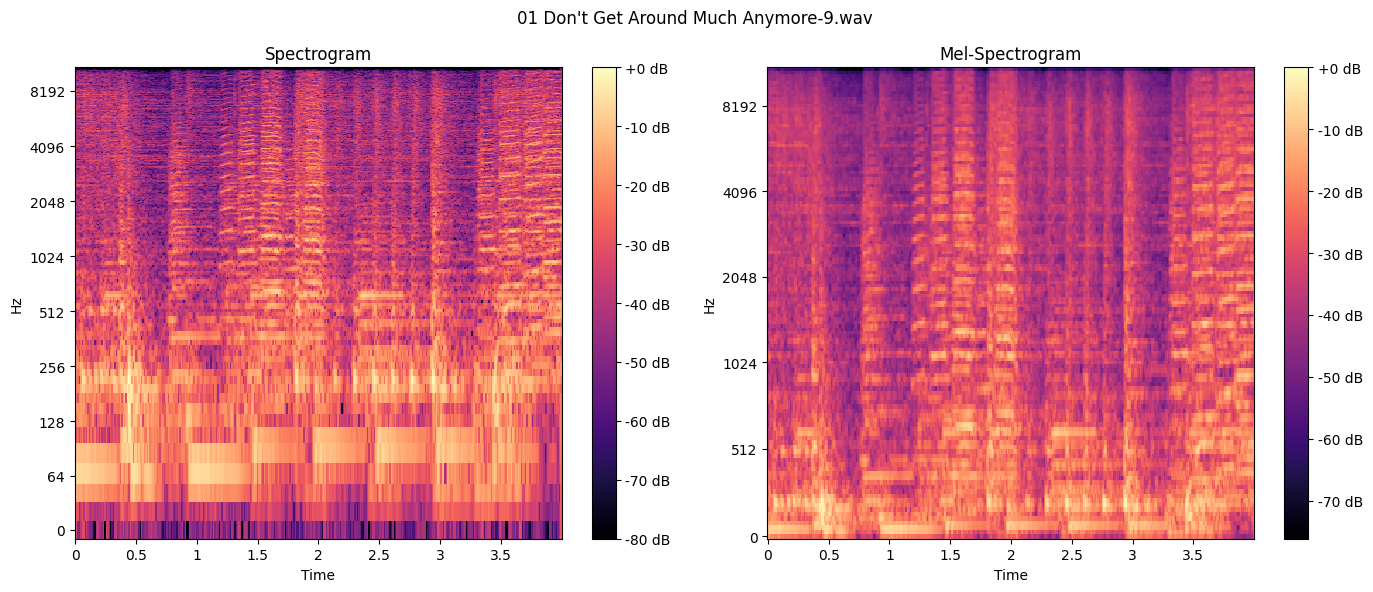

Processing 2/813 → 01 Don't Get Around Much Anymore-7.wav


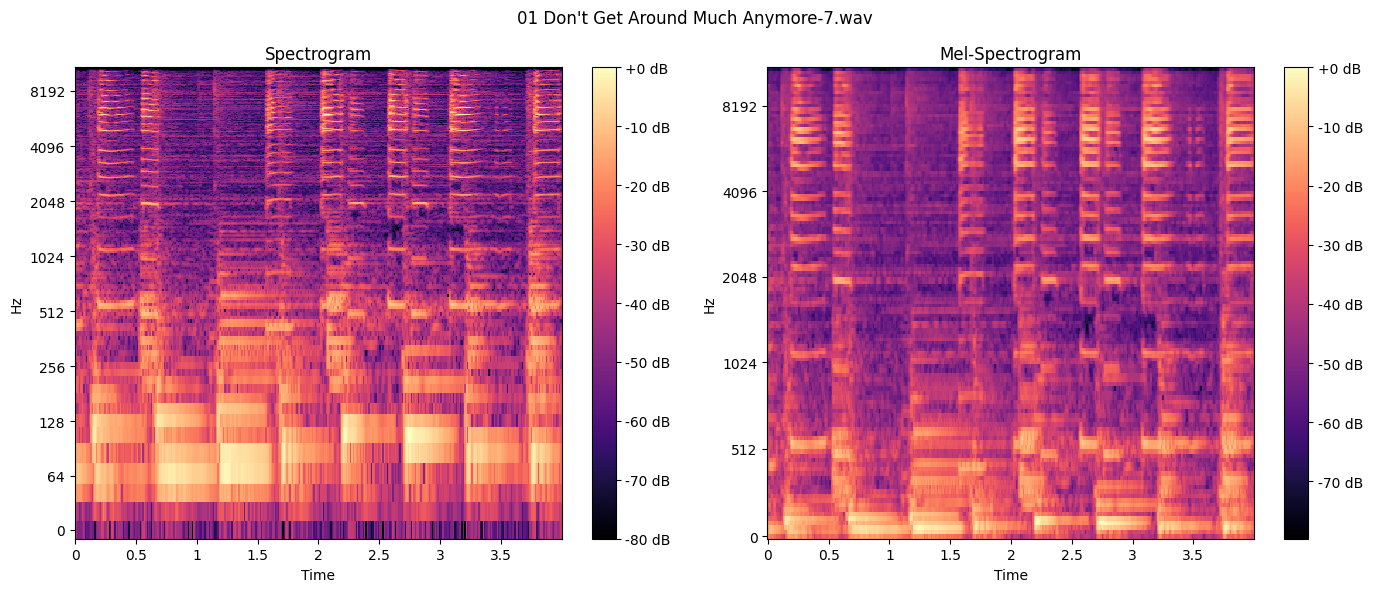

Processing 3/813 → 01 Chuck Mangione_Feels So Good_Feels So Good-8.wav


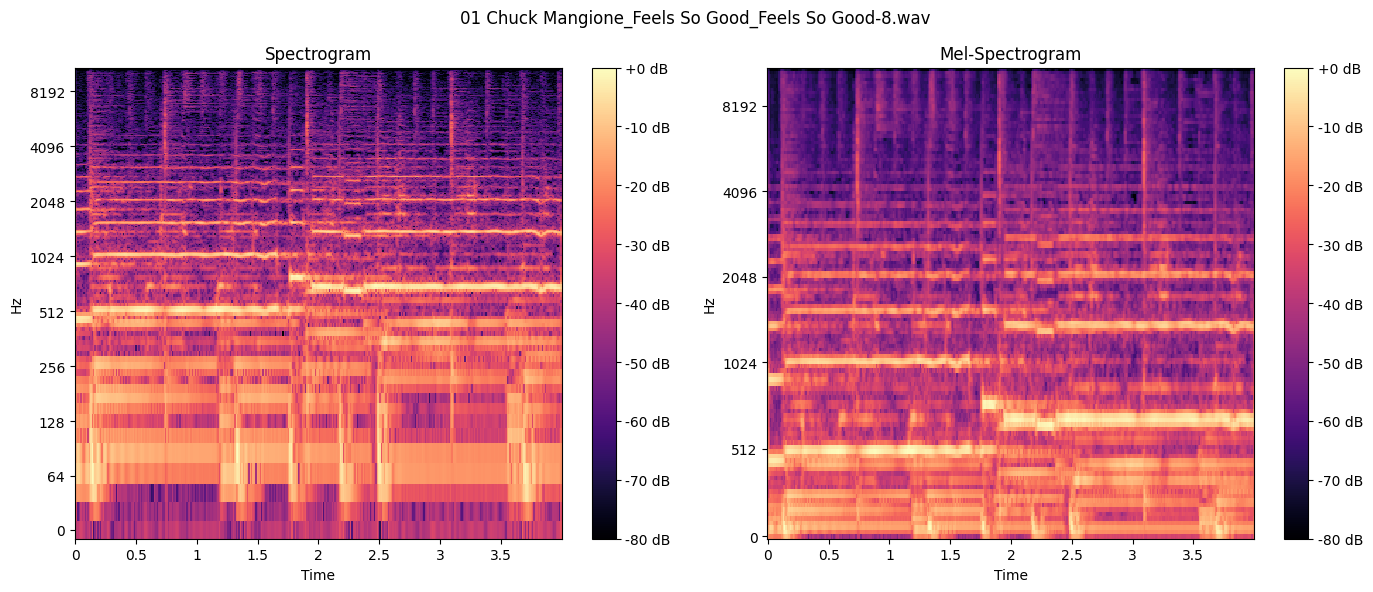

Processing 4/813 → 01 Emily-11.wav


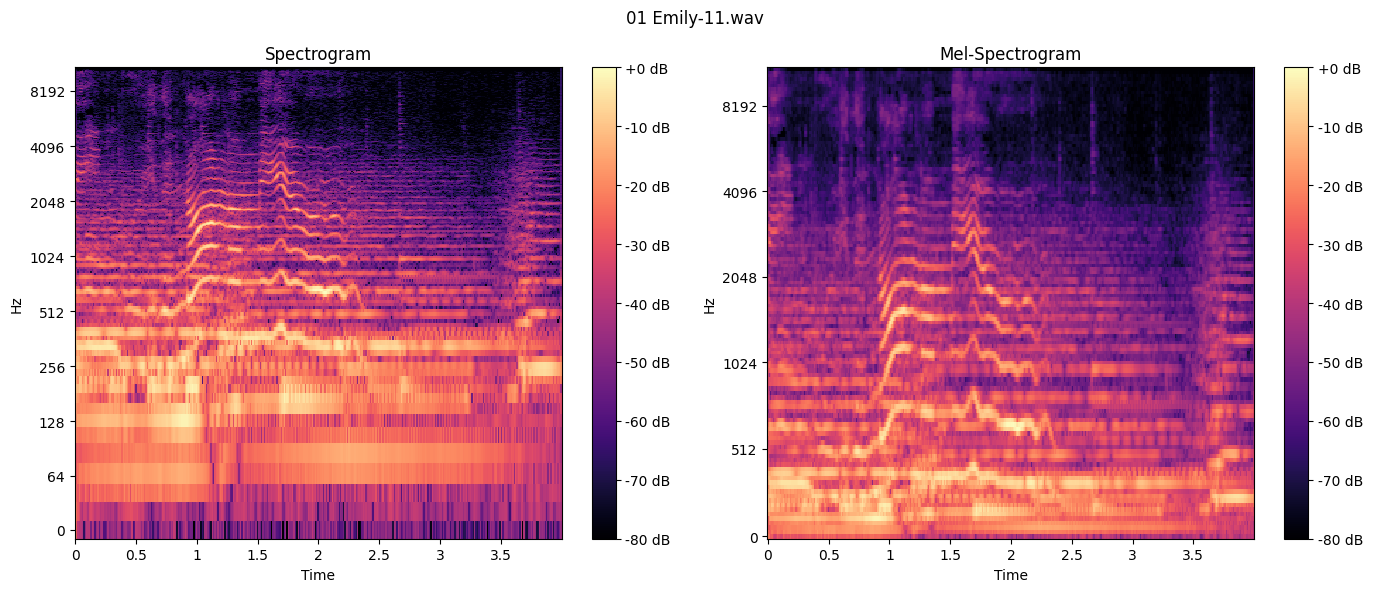

Processing 5/813 → 01 Chuck Mangione_Feels So Good_Feels So Good-34.wav


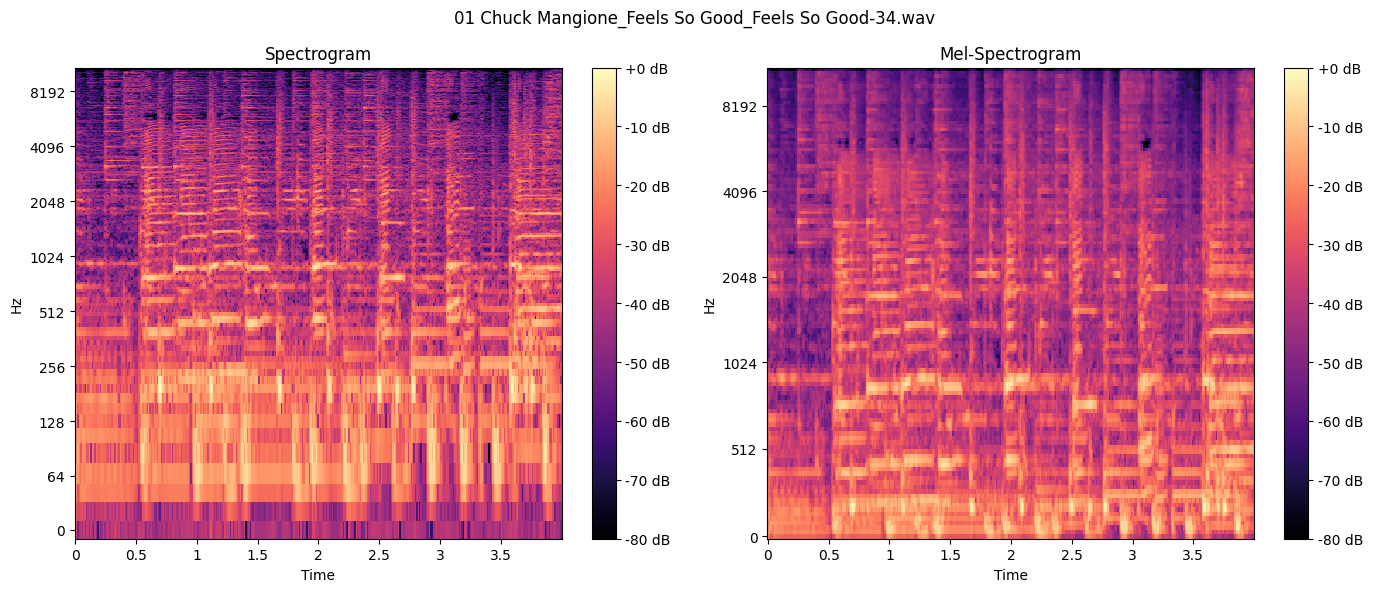

Processing 6/813 → 01 El Patufet-5.wav


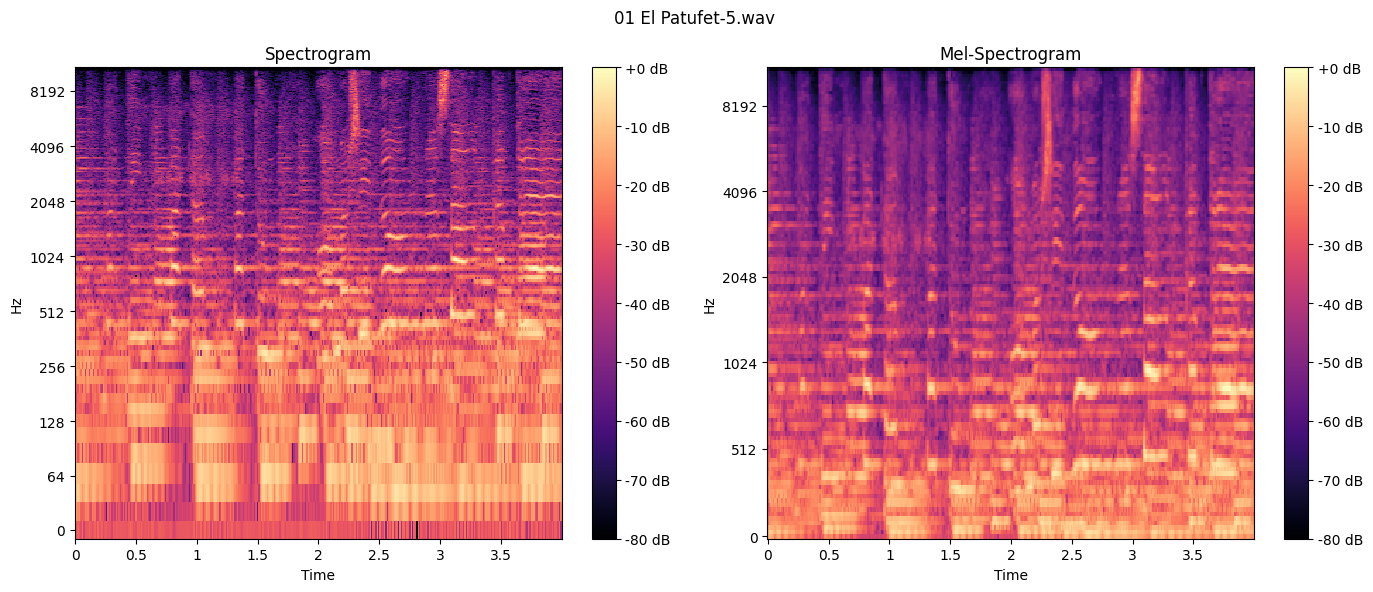

Processing 7/813 → 01 Don't Get Around Much Anymore-12.wav


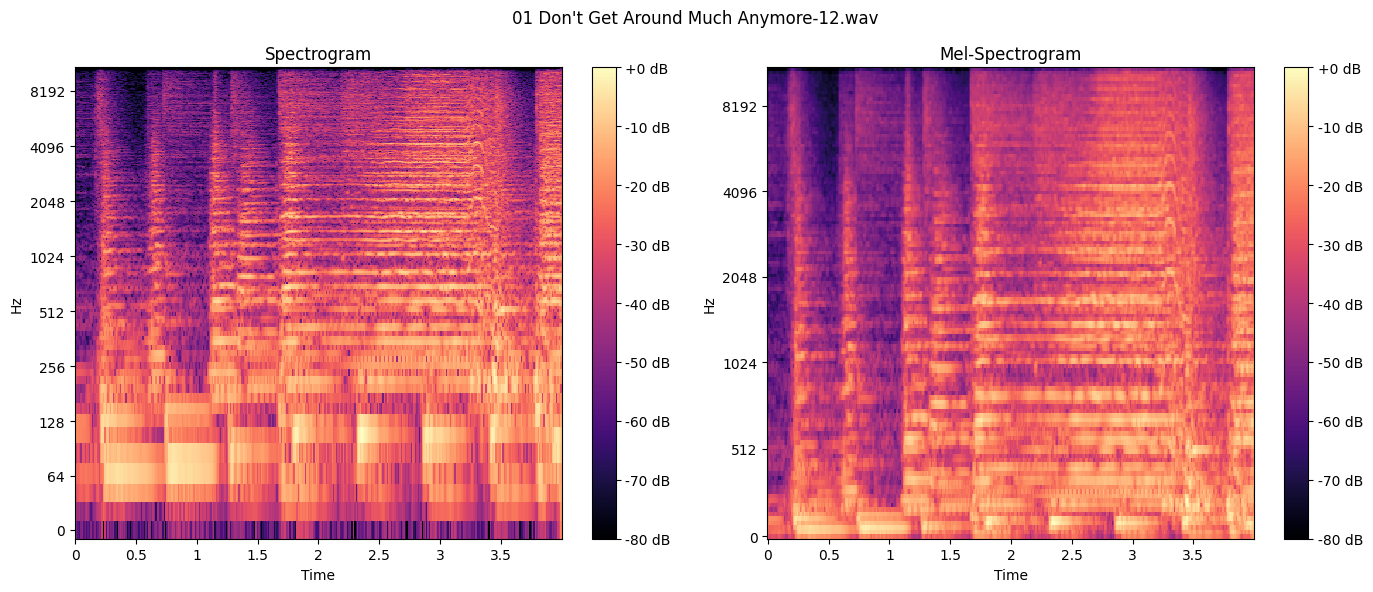

Processing 8/813 → 01 El Patufet-7.wav


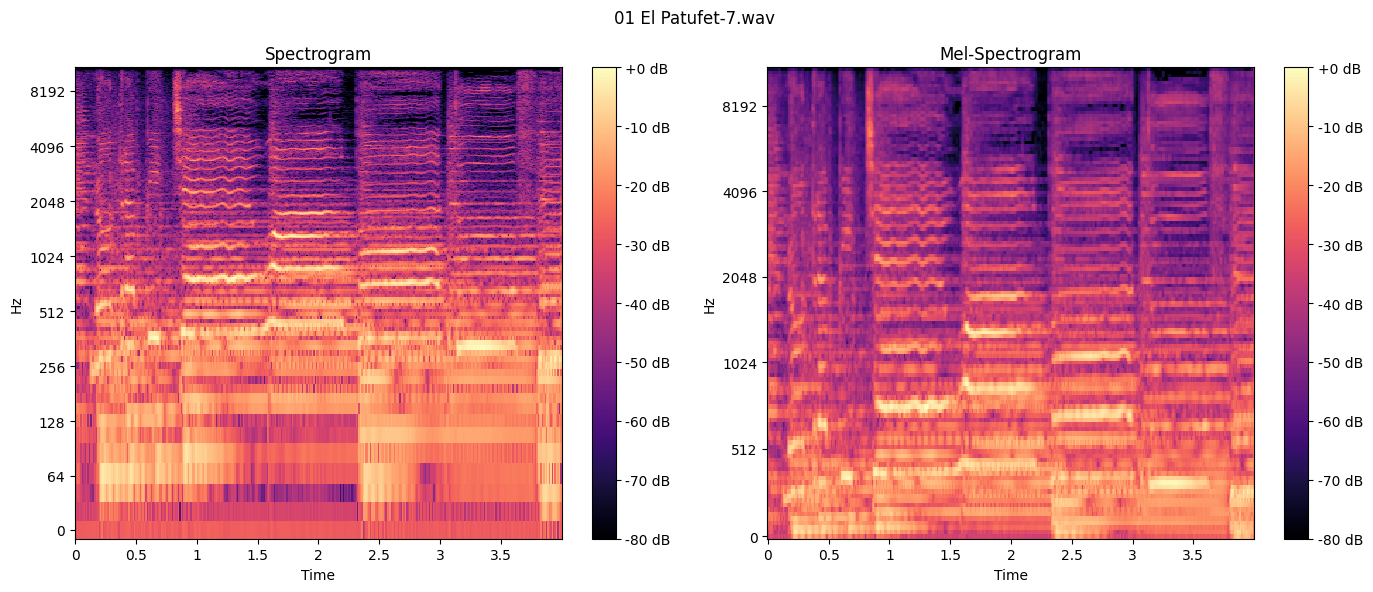

Processing 9/813 → 01 Don't Get Around Much Anymore-6.wav


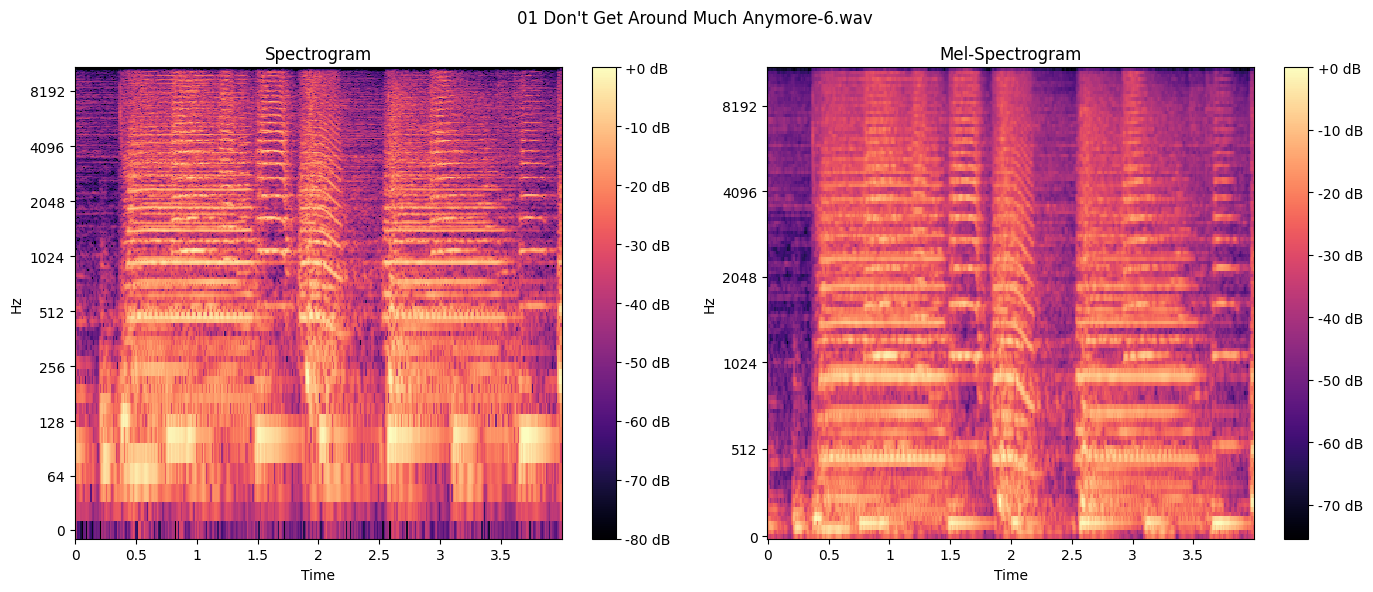

Processing 10/813 → 01 Don't Get Around Much Anymore-13.wav


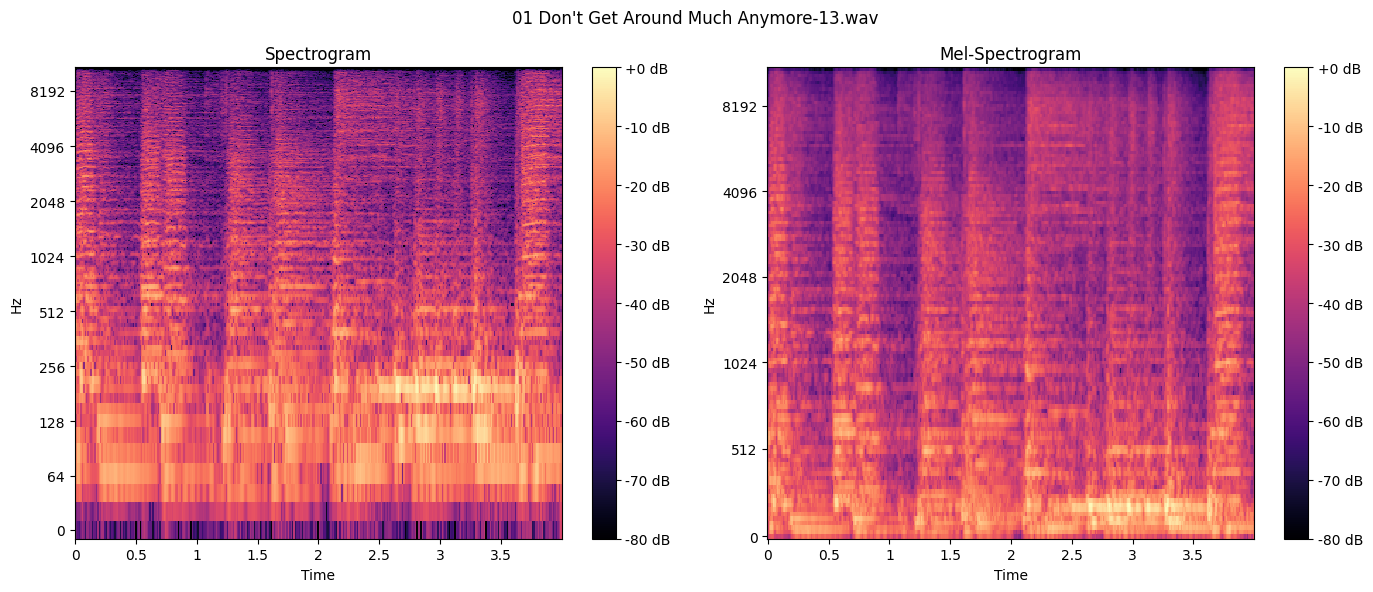

Processing 11/813 → 01 El Patufet-3.wav
Processing 12/813 → 01 Don't Get Around Much Anymore-10.wav
Processing 13/813 → 01 Emily-1.wav
Processing 14/813 → 01 Emily-13.wav
Processing 15/813 → 01 Chuck Mangione_Feels So Good_Feels So Good-6.wav
Processing 16/813 → 01 Don't Get Around Much Anymore-16.wav
Processing 17/813 → 01 El Patufet-1.wav
Processing 18/813 → 01 Don't Get Around Much Anymore-2.wav
Processing 19/813 → 01 El Patufet-6.wav
Processing 20/813 → 01 Emily-38.wav
Processing 21/813 → 01 Emily-32.wav
Processing 22/813 → 01 Emily-8.wav
Processing 23/813 → 01 Emily-16.wav
Processing 24/813 → 01 Emily-40.wav
Processing 25/813 → 01 Emily-28.wav
Processing 26/813 → 01 Emily-36.wav
Processing 27/813 → 01 Good Vibrations-1.wav
Processing 28/813 → 01 Emily-18.wav
Processing 29/813 → 01 Emily-24.wav
Processing 30/813 → 01 Emily-34.wav
Processing 31/813 → 01 Emily-5.wav
Processing 32/813 → 01 Emily-23.wav
Processing 33/813 → 01 Emily-9.wav
Processing 34/813 → 01 Emily-37.wav
Processing 3

In [ ]:
#Process Entire Dataset
import pandas as pd
metadata = []

SHOW_LIMIT = 10

for idx, file_path in enumerate(audio_files):
    print(f"Processing {idx+1}/{len(audio_files)} → {file_path.name}")

    # Load & preprocess
    y, sr = preprocess_audio(str(file_path))

    # Features
    spec = get_spectrogram(y)
    mel = get_melspectrogram(y, sr)

    # File to save visualization
    out_img = OUTPUT_DIR / f"spectrogram_{idx}.png"

    # Show only first 10, save for all
    if idx < SHOW_LIMIT:
        visualize_and_save(spec, mel, out_img, title=file_path.name)
    else:
        # Save silently without showing
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        librosa.display.specshow(spec, sr=TARGET_SR, hop_length=256)
        plt.colorbar()

        plt.subplot(1, 2, 2)
        librosa.display.specshow(mel, sr=TARGET_SR, hop_length=256)
        plt.colorbar()

        plt.tight_layout()
        plt.savefig(out_img)
        plt.close()

    # Save metadata
    metadata.append({
        "index": idx,
        "audio_file": str(file_path),
        "spectrogram_image": str(out_img)
    })


In [ ]:
#Save metadata CSV
df = pd.DataFrame(metadata)
df.to_csv(OUTPUT_DIR / "metadata2.csv", index=False)

print("✔ Finished! All visualizations & metadata2 saved in your Drive.")
